In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = r"C:\Users\intui\Desktop\Coursework\Fall 2022\(24-787) Introduction to Machine Learning and Artificial Intelligence for Engineers\Project\export.csv"
data = pd.read_csv(csv_file)
data

,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [3]:
def canonical(smiles):
    
    a,b = [],[]
    
    for i in smiles:
        a.append(Chem.MolFromSmiles(i))
        
    for j in a:
        b.append(Chem.MolToSmiles(j))
                 
    return b

Fingerprint = canonical(data['smiles'])


In [4]:
data['smiles'] = Fingerprint
data

,smiles,property,value
0,*CC(*)C,Eat,-5.14
1,*CC(*)F,Eat,-5.18
2,*CC(*)(F)F,Eat,-5.21
3,*C(F)C(*)(F)F,Eat,-5.11
4,*CCC(F)(F)C(*)(F)F,Eat,-5.21
...,...,...,...
6260,*c1ccc(-c2ccc(C(F)(F)C(*)(F)F)s2)s1,eps,4.36
6261,*OC(=O)C(F)(F)C(*)(F)F,eps,3.31
6262,*c1ccc(C(F)(F)C(=O)C(*)(F)F)s1,eps,4.05
6263,*c1ccc(C(F)(F)C(=O)C(*)(F)F)cc1,eps,3.57


In [5]:
properties = data.groupby('property').count()
properties

,smiles,value
property,,
Eat,390,390
Eea,368,368
Egb,561,561
Egc,3380,3380
Ei,370,370
Xc,432,432
eps,382,382
nc,382,382


In [6]:
df1 = data.groupby('property').get_group('Eat').index
df2 = data.groupby('property').get_group('Eea').index
df3 = data.groupby('property').get_group('Egb').index
df4 = data.groupby('property').get_group('Egc').index
df5 = data.groupby('property').get_group('Ei').index
df6 = data.groupby('property').get_group('Xc').index
df7 = data.groupby('property').get_group('eps').index
df8 = data.groupby('property').get_group('nc').index

df4[0], df4[-1]

(822, 4201)

### RDKit

In [7]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] 
                                    for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(data['smiles'])

In [8]:
df_n = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_n

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.465278,-2.404514,7.465278,0.724792,0.414720,42.081,36.033,42.046950,18,0,...,0,0,0,0,0,0,0,0,0,0
1,12.361111,-2.118056,12.361111,0.666667,0.409424,46.044,43.020,46.021878,18,0,...,0,0,0,0,0,0,0,0,0,0
2,12.027778,-2.868056,12.027778,0.854167,0.427904,64.034,62.018,64.012457,24,0,...,0,0,0,0,0,0,0,0,0,0
3,11.986111,-3.201389,11.986111,1.187500,0.441842,82.024,81.016,82.003035,30,0,...,0,0,0,0,0,0,0,0,0,0
4,12.941875,-4.883681,12.941875,1.453681,0.510440,128.068,124.036,128.024913,48,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,13.869230,-4.441628,13.869230,0.020181,0.737828,264.268,260.236,263.969055,84,0,...,0,0,0,0,0,0,0,2,0,0
6261,12.202454,-4.574653,12.202454,1.048588,0.534777,144.023,144.023,143.983442,52,0,...,0,0,0,0,0,0,0,0,0,0
6262,13.544977,-4.337917,13.544977,0.343579,0.694102,210.151,208.135,209.976249,70,0,...,0,0,0,0,0,0,0,1,0,0
6263,13.883065,-4.723495,13.883065,0.052901,0.684136,204.122,200.090,204.019828,74,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def scale_data(X):
    xmean = X.mean(axis=0)  # average of every column
    xstd = X.std(axis=0)
    data = (X - xmean) / xstd
    return data
df_new = scale_data(df_n)
df_new

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.490311,0.306916,-1.490311,0.658047,-0.569051,-1.426289,-1.454042,-1.426038,-1.316104,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,-0.453321,-0.021886,-0.137297
1,0.574057,0.468544,0.574057,0.537676,-0.599930,-1.397834,-1.401048,-1.397473,-1.316104,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,-0.453321,-0.021886,-0.137297
2,0.433504,0.045373,0.433504,0.925969,-0.492186,-1.268661,-1.256956,-1.268186,-1.202737,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,-0.453321,-0.021886,-0.137297
3,0.415935,-0.142703,0.415935,1.616269,-0.410924,-1.139488,-1.112863,-1.138899,-1.089371,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,-0.453321,-0.021886,-0.137297
4,0.818941,-1.091899,0.818941,2.167502,-0.010985,-0.808881,-0.786573,-0.808169,-0.749270,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,-0.453321,-0.021886,-0.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,1.209967,-0.842481,1.209967,-0.801130,1.314725,0.169068,0.246450,0.168776,-0.069070,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,2.728815,-0.021886,-0.137297
6261,0.507158,-0.917537,0.507158,1.328596,0.130904,-0.694320,-0.634980,-0.693485,-0.673692,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,-0.453321,-0.021886,-0.137297
6262,1.073243,-0.783964,1.073243,-0.131407,1.059794,-0.219505,-0.148716,-0.219236,-0.333592,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,1.137747,-0.021886,-0.137297
6263,1.215801,-1.001518,1.215801,-0.733372,1.001692,-0.262795,-0.209734,-0.262041,-0.258014,NaN,...,-0.113522,-0.016951,-0.118924,-0.028259,NaN,-0.076149,NaN,-0.453321,-0.021886,-0.137297


In [10]:
Y_global = pd.DataFrame(data.value)
df_new = df_new.dropna(axis = 1, how = 'any')
X_global = df_new
display(X_global, Y_global)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.490311,0.306916,-1.490311,0.658047,-0.569051,-1.426289,-1.454042,-1.426038,-1.316104,3.973989,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
1,0.574057,0.468544,0.574057,0.537676,-0.599930,-1.397834,-1.401048,-1.397473,-1.316104,3.499484,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
2,0.433504,0.045373,0.433504,0.925969,-0.492186,-1.268661,-1.256956,-1.268186,-1.202737,1.720092,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
3,0.415935,-0.142703,0.415935,1.616269,-0.410924,-1.139488,-1.112863,-1.138899,-1.089371,1.221862,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
4,0.818941,-1.091899,0.818941,2.167502,-0.010985,-0.808881,-0.786573,-0.808169,-0.749270,0.118639,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,1.209967,-0.842481,1.209967,-0.801130,1.314725,0.169068,0.246450,0.168776,-0.069070,-0.593118,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,2.728815,-0.021886,-0.137297
6261,0.507158,-0.917537,0.507158,1.328596,0.130904,-0.694320,-0.634980,-0.693485,-0.673692,0.019784,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
6262,1.073243,-0.783964,1.073243,-0.131407,1.059794,-0.219505,-0.148716,-0.219236,-0.333592,0.104951,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,1.137747,-0.021886,-0.137297
6263,1.215801,-1.001518,1.215801,-0.733372,1.001692,-0.262795,-0.209734,-0.262041,-0.258014,-0.262659,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297


,value
0,-5.14
1,-5.18
2,-5.21
3,-5.11
4,-5.21
...,...
6260,4.36
6261,3.31
6262,4.05
6263,3.57


## Machine Learning Model - Support Vector Regression

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt

### Property EGC

In [12]:
x_EGC = X_global.iloc[df4[0]:df4[-1] + 1]
y_EGC = Y_global.iloc[df4[0]:df4[-1] + 1]
display(x_EGC, y_EGC)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
822,-1.759704,1.381496,-1.759704,-0.742255,-0.914629,-1.627724,-1.636239,-1.627482,-1.542838,6.346512,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
823,-1.490311,0.306916,-1.490311,0.658047,-0.569051,-1.426289,-1.454042,-1.426038,-1.316104,3.973989,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
824,-1.391485,0.024763,-1.391485,1.037711,-0.355197,-1.325572,-1.362943,-1.325317,-1.202737,2.787727,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
825,-1.328237,-0.151558,-1.328237,1.329152,-0.208039,-1.224854,-1.271844,-1.224595,-1.089371,2.075971,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
826,-1.264988,-0.327880,-1.264988,1.620592,-0.118364,-1.124137,-1.180745,-1.123873,-0.976004,1.364214,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,-1.420191,1.400722,-1.420191,-0.758553,0.173435,-1.045331,-1.074508,-1.045014,-1.013793,0.652457,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
4198,-1.005274,-1.373411,-1.005274,3.173615,-0.729893,-0.189018,-0.330579,-0.188597,0.044297,-0.771057,...,-0.125057,40.858783,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
4199,-0.952910,-1.615143,-0.952910,3.351639,-1.195309,0.314569,0.124914,0.315012,0.611131,-1.126936,...,-0.125057,40.858783,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
4200,-0.896201,-1.808027,-0.896201,3.446478,-2.268805,1.120307,0.853704,1.120785,1.518065,-1.431974,...,-0.125057,40.858783,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297


,value
822,6.8972
823,6.5196
824,6.5170
825,6.7336
826,6.7394
...,...
4197,3.3666
4198,0.2161
4199,0.1032
4200,0.1771


In [13]:
support_vector_regressor_EGC = SVR(kernel = 'rbf')
support_vector_regressor_EGC.fit(x_EGC, y_EGC)
y_EGC_pred = support_vector_regressor_EGC.predict(x_EGC)

result_EGC = x_EGC
result_EGC['value'] = y_EGC
result_EGC['prediction'] = y_EGC_pred.tolist()
result_EGC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,value,prediction
822,-1.759704,1.381496,-1.759704,-0.742255,-0.914629,-1.627724,-1.636239,-1.627482,-1.542838,6.346512,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,6.8972,6.164189
823,-1.490311,0.306916,-1.490311,0.658047,-0.569051,-1.426289,-1.454042,-1.426038,-1.316104,3.973989,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,6.5196,6.358006
824,-1.391485,0.024763,-1.391485,1.037711,-0.355197,-1.325572,-1.362943,-1.325317,-1.202737,2.787727,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,6.5170,6.349887
825,-1.328237,-0.151558,-1.328237,1.329152,-0.208039,-1.224854,-1.271844,-1.224595,-1.089371,2.075971,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,6.7336,6.341068
826,-1.264988,-0.327880,-1.264988,1.620592,-0.118364,-1.124137,-1.180745,-1.123873,-0.976004,1.364214,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,6.7394,6.279744


In [14]:
R2_EGC = r2_score(y_EGC, y_EGC_pred)
print('R^2 of Chain Band Gap:', R2_EGC)

RMSE_EGC = np.sqrt(mean_squared_error(y_EGC, y_EGC_pred))
print('RMSE of Chain Band Gap:', RMSE_EGC)

R^2 of Chain Band Gap: 0.8718544169487699
RMSE of Chain Band Gap: 0.559480950027568


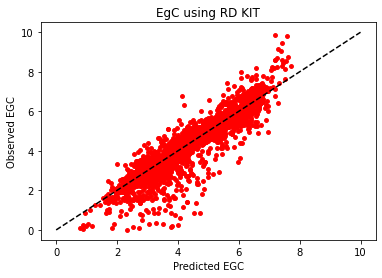

In [32]:
plt.scatter(y_EGC_pred, y_EGC, c = "r", s = 15)
plt.plot([0, 10], [0, 10] ,"k--")
plt.xlabel('Predicted EGC')
plt.ylabel('Observed EGC')
plt.title("EgC using RD KIT");

### Cross Validation - EGC

In [16]:
X_EGC_train, X_EGC_test, Y_EGC_train, Y_EGC_test = train_test_split(x_EGC, y_EGC, test_size = 0.3)
  
SVR_EGC = SVR()

SVR_EGC.fit(X_EGC_train, Y_EGC_train) 

scores_EGC = cross_val_score(SVR_EGC, X_EGC_train, Y_EGC_train , cv = 5, scoring = 'neg_mean_squared_error')

Y_EGC_pred_test = SVR_EGC.predict(X_EGC_test)
# type(Y_EPS_test)
# Y_EPS_pred_train = SVR_EPS.predict(X_EPS_train)

result1_EGC = X_EGC_test
result1_EGC['value'] = Y_EGC_test
result1_EGC['prediction'] = Y_EGC_pred_test.tolist()
RMSE_EGC_CV = np.sqrt(np.absolute(min(scores_EGC)))
print('RMSE of Crystalization Tendency after Cross Validation is:', RMSE_EGC_CV)

RMSE of Crystalization Tendency after Cross Validation is: 0.3963951733987364


### Hyperparameter Tuning - EGC

In [17]:
SVR_EGC_HYP = SVR()
params_EGC = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_EGC = GridSearchCV(SVR_EGC_HYP, params_EGC, refit = True, verbose = 3)

grid_EGC.fit(X_EGC_train, Y_EGC_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.018 total time=   2.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.008 total time=   2.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.019 total time=   2.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.022 total time=   1.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time=   2.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.221 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.232 total time=   1.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   1.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.240 total time=   1.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.251 total time=   2.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.757 total time=   1.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.151 total time=   2.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.172 total time=   2.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.190 total time=   2.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.182 total time=   2.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.572 total time=   1.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.630 total time=   2.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.549 total time=   2.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.618 total time=   2.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.602 total time=   2.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.905 total time=   0.9s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.920 total time=   1.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.892 total time=   0.9s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
print(grid_EGC.best_params_)
print(grid_EGC.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.0001)


In [19]:
grid_predictions_EGC = grid_EGC.predict(X_EGC_test)
grid_predictions_full_EGC = grid_EGC.predict(x_EGC)

In [20]:
R2_EGC_tuned = r2_score(Y_EGC_test, grid_predictions_EGC)
print('R^2 of Chain Band Gap after Tuning:', R2_EGC)

RMSE_EGC = np.sqrt(mean_squared_error(Y_EGC_test, grid_predictions_EGC))
print('RMSE of Chain Band Gap after Tuning:', RMSE_EGC)

R^2 of Chain Band Gap after Tuning: 0.8718544169487699
RMSE of Chain Band Gap after Tuning: 0.07836824359591445


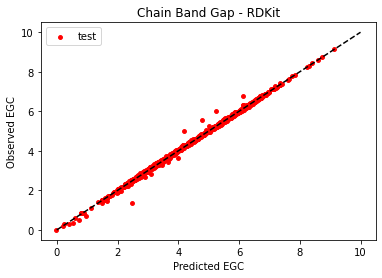

In [21]:
plt.scatter(grid_predictions_EGC, Y_EGC_test, c = "r", s = 15, label = 'test')
plt.plot([0, 10], [0, 10] ,"k--")
plt.xlabel('Predicted EGC')
plt.ylabel('Observed EGC')
plt.title("EgC using RD KIT")
plt.legend();

### Property XC

In [22]:
x_XC = X_global.iloc[df6[0]:df6[-1] + 1]
y_XC = Y_global.iloc[df6[0]:df6[-1] + 1]
display(x_XC, y_XC)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
390,-1.759704,1.381496,-1.759704,-0.742255,-0.914629,-1.627724,-1.636239,-1.627482,-1.542838,6.346512,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
391,-1.490311,0.306916,-1.490311,0.658047,-0.569051,-1.426289,-1.454042,-1.426038,-1.316104,3.973989,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
392,-1.391485,0.024763,-1.391485,1.037711,-0.355197,-1.325572,-1.362943,-1.325317,-1.202737,2.787727,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
393,-1.328237,-0.151558,-1.328237,1.329152,-0.208039,-1.224854,-1.271844,-1.224595,-1.089371,2.075971,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
394,-1.264988,-0.327880,-1.264988,1.620592,-0.118364,-1.124137,-1.180745,-1.123873,-0.976004,1.364214,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0.102619,0.535154,0.102619,0.437007,-0.785063,-1.369378,-1.348054,-1.368908,-1.316104,0.652457,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
818,-1.574868,0.730374,-1.574868,0.043920,-0.545889,-1.340047,-1.362943,-1.339802,-1.240526,1.008335,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
819,0.993429,-1.804021,0.993429,1.437265,-2.532584,2.485193,2.433069,2.484677,2.387211,-1.014096,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297
820,1.026373,-1.823228,1.026373,1.615238,-2.706394,3.132313,3.070760,3.131788,3.029622,-1.126936,...,-0.125057,-0.029369,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297


,value
390,47.80
391,44.47
392,34.04
393,20.01
394,21.64
...,...
817,31.84
818,25.58
819,29.05
820,21.74


In [23]:
support_vector_regressor_XC = SVR(kernel = 'rbf')
support_vector_regressor_XC.fit(x_XC, y_XC)
y_XC_pred = support_vector_regressor_XC.predict(x_XC)

result_XC = x_XC
result_XC['value'] = y_XC
result_XC['prediction'] = y_XC_pred.tolist()
result_XC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,value,prediction
390,-1.759704,1.381496,-1.759704,-0.742255,-0.914629,-1.627724,-1.636239,-1.627482,-1.542838,6.346512,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,47.80,37.934741
391,-1.490311,0.306916,-1.490311,0.658047,-0.569051,-1.426289,-1.454042,-1.426038,-1.316104,3.973989,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,44.47,38.784945
392,-1.391485,0.024763,-1.391485,1.037711,-0.355197,-1.325572,-1.362943,-1.325317,-1.202737,2.787727,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,34.04,39.078213
393,-1.328237,-0.151558,-1.328237,1.329152,-0.208039,-1.224854,-1.271844,-1.224595,-1.089371,2.075971,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,20.01,39.014979
394,-1.264988,-0.327880,-1.264988,1.620592,-0.118364,-1.124137,-1.180745,-1.123873,-0.976004,1.364214,...,-0.113522,-0.016951,-0.118924,-0.028259,-0.076149,-0.453321,-0.021886,-0.137297,21.64,38.527526


In [24]:
R2_XC = r2_score(y_XC, y_XC_pred)
print('R^2 of Crystallization Tendency:', R2_XC)

RMSE_XC = np.sqrt(mean_squared_error(y_XC, y_XC_pred))
print('RMSE of Crystallization Tendency:', RMSE_XC)

R^2 of Crystallization Tendency: 0.11877235460276114
RMSE of Crystallization Tendency: 22.25360993236077


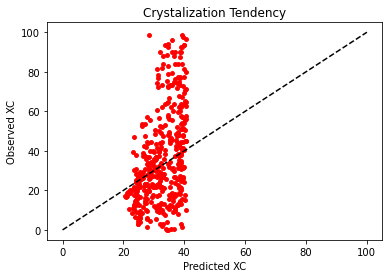

In [25]:
plt.scatter(y_XC_pred, y_XC, c = "r", s = 15)
plt.plot([0, 100], [0, 100] ,"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("Crystalization Tendency");

### Cross Validation - XC

In [26]:
X_XC_train, X_XC_test, Y_XC_train, Y_XC_test = train_test_split(x_XC, y_XC, test_size = 0.3)
  
SVR_XC = SVR()
  
SVR_XC.fit(X_XC_train, Y_XC_train) 

scores_XC = cross_val_score(SVR_XC, X_XC_train, Y_XC_train , cv = 5, scoring = 'neg_mean_squared_error')

Y_XC_pred_test = SVR_XC.predict(X_XC_test)
# type(Y_EPS_test)
# Y_EPS_pred_train = SVR_EPS.predict(X_EPS_train)

result1_XC = X_XC_test
result1_XC['value'] = Y_XC_test
result1_XC['prediction'] = Y_XC_pred_test.tolist()
RMSE_XC_CV = np.sqrt(np.absolute(min(scores_XC)))
print('RMSE of Crystalization Tendency after Cross Validation is:', RMSE_XC_CV)

RMSE of Crystalization Tendency after Cross Validation is: 8.606469298243134


### Hyperparameter Tuning - XC

In [27]:
SVR_XC_HYP = SVR()
params_XC = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_XC = GridSearchCV(SVR_XC_HYP, params_XC, refit = True, verbose = 3)

grid_XC.fit(X_XC_train, Y_XC_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.151 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.060 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.150 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.060 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.069 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.112 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.006 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.165 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.144 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.264 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.226 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.924 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.705 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.843 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.999 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
print(grid_XC.best_params_)
print(grid_XC.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.0001)


In [29]:
grid_predictions_XC = grid_XC.predict(X_XC_test)
grid_predictions_full_XC = grid_XC.predict(x_XC)

In [30]:
R2_XC_tuned = r2_score(Y_XC_test, grid_predictions_XC)
print('R^2 of Crystallization Tendency after Tuning:', R2_XC_tuned)

RMSE_XC_tuned = np.sqrt(mean_squared_error(Y_XC_test, grid_predictions_XC))
print('RMSE of Crystalization Tendency after Tuning:', RMSE_XC_tuned)

R^2 of Crystallization Tendency after Tuning: 0.9896377619913816
RMSE of Crystalization Tendency after Tuning: 2.1557849254821604


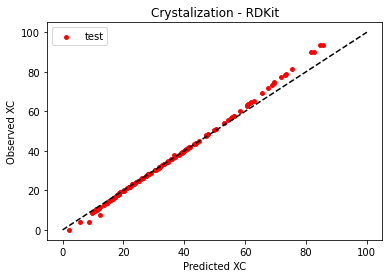

In [31]:
plt.scatter(grid_predictions_XC, Y_XC_test, c = "r", s = 15, label = 'test')
plt.plot([0, 100], [0, 100] ,"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("Crystalization - RDKit")
plt.legend();